In [5]:
from astropy.io import fits
from astropy.wcs import WCS
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [6]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

In [7]:
imageV = rootPath + "Comet 2019/images/march09_stacked_V.fits"
imageR = rootPath + "Comet 2019/images/march09_stacked_R.fits"
imageGG495 = rootPath + "Comet 2019/images/march09_stacked_GG495.fits"

In [8]:
def GetColourIndex(mainImagePath, subtractedImagePath, label):
    mainImage = fits.open(mainImagePath)[0].data
    subtractedImage = fits.open(subtractedImagePath)[0].data

    colourIndexImage = mainImage - subtractedImage


    vmax = np.max(np.abs(colourIndexImage))
    vmin = - vmax

    norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    plt.imshow(colourIndexImage, cmap="bwr", norm=norm)
    plt.colorbar(label="Subtracted Counts")

    plt.title(label)
    plt.xlabel("Arbitrary X")
    plt.ylabel("Arbitrary Y")

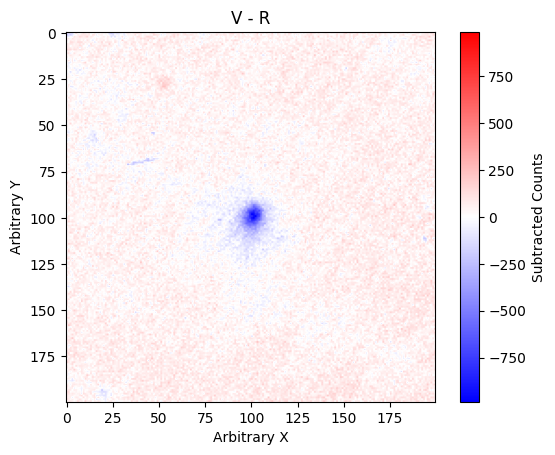

In [9]:
GetColourIndex(imageV, imageR, label="V - R")

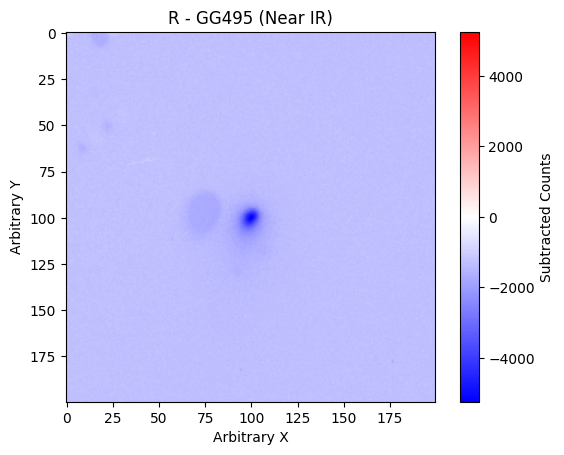

In [10]:
GetColourIndex(imageR, imageGG495, label="R - GG495 (Near IR)")

While this provides some insight, it doesn't tell us much, and certainly isn't a colour index. To calculate this, we will need photutils to estimate the magnitude of the comet in each filter.

In [11]:
from photutils.aperture import CircularAperture, aperture_photometry

In [29]:
positions = [(30.0, 30.0), (40.0, 40.0)]

apertureRadius = 10
aperture = CircularAperture((0, 0), r=apertureRadius)

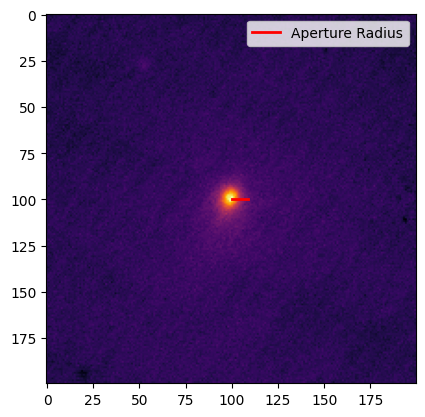

In [32]:
imageData = fits.open(imageV)[0].data

photutilsTableV = aperture_photometry(imageData, aperture)

plt.imshow(imageData, cmap="inferno")

radiusRange = np.arange(len(imageData)/2, len(imageData)/2 + apertureRadius)

plt.plot(radiusRange, [len(imageData)/2]*len(radiusRange), color="red", linewidth="2", label="Aperture Radius")

plt.legend()

In [33]:
print(photutilsTableV)

 id xcenter ycenter    aperture_sum   
      pix     pix                     
--- ------- ------- ------------------
  1     0.0     0.0 382977.31394138763
